2025-12-01 19:12:24.425652: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-01 19:12:24.460609: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-01 19:12:25.181137: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/home/navit/DAV_LAB/.venv/lib/python3.13/site-packages/keras/src/layers/core/dense.py:95: U

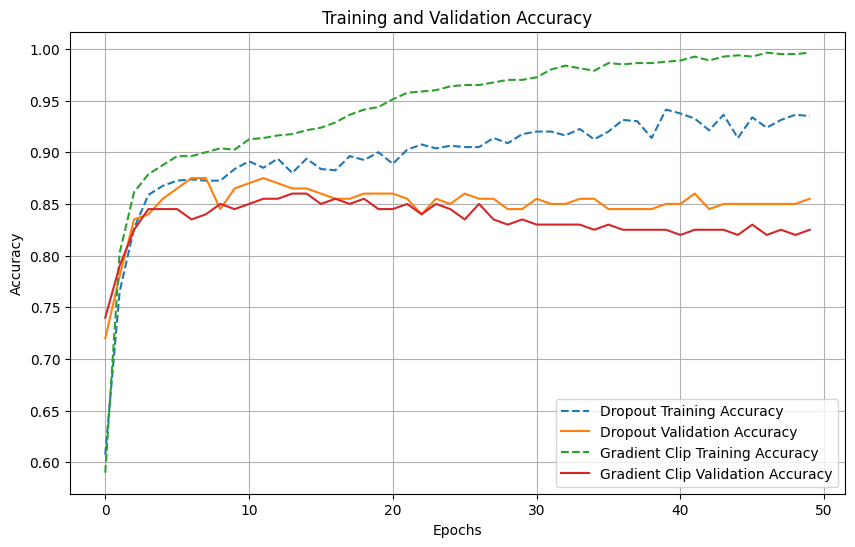

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def create_dropout_model(dropout_rate=0.2):
    model = Sequential([
        Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
        Dropout(dropout_rate),
        Dense(32, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    return model

dropout_model = create_dropout_model(dropout_rate=0.2)
dropout_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
dropout_history = dropout_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

def create_gradient_clip_model(clip_norm=1.0):
    model = Sequential([
        Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    optimizer = Adam(clipnorm=clip_norm)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

gradient_clip_model = create_gradient_clip_model(clip_norm=1.0)
gradient_clip_history = gradient_clip_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

plt.figure(figsize=(10, 6))
plt.plot(dropout_history.history['accuracy'], label='Dropout Training Accuracy', linestyle='--')
plt.plot(dropout_history.history['val_accuracy'], label='Dropout Validation Accuracy')
plt.plot(gradient_clip_history.history['accuracy'], label='Gradient Clip Training Accuracy', linestyle='--')
plt.plot(gradient_clip_history.history['val_accuracy'], label='Gradient Clip Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/20


2025-12-01 19:12:52.232033: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-12-01 19:12:52.508298: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_149', 20 bytes spill stores, 20 bytes spill loads

2025-12-01 19:12:53.058762: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_554', 240 bytes spill stores, 240 bytes spill loads



1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - dense_7_accuracy: 0.9153 - dense_7_loss: 0.2956 - dense_8_accuracy: 0.9417 - dense_8_loss: 0.1577 - loss: 0.4533 - val_dense_7_accuracy: 0.9529 - val_dense_7_loss: 0.1666 - val_dense_8_accuracy: 0.9706 - val_dense_8_loss: 0.0875 - val_loss: 0.2541
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - dense_7_accuracy: 0.9614 - dense_7_loss: 0.1322 - dense_8_accuracy: 0.9749 - dense_8_loss: 0.0728 - loss: 0.2050 - val_dense_7_accuracy: 0.9657 - val_dense_7_loss: 0.1134 - val_dense_8_accuracy: 0.9725 - val_dense_8_loss: 0.0761 - val_loss: 0.1895
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - dense_7_accuracy: 0.9732 - dense_7_loss: 0.0907 - dense_8_accuracy: 0.9818 - dense_8_loss: 0.0544 - loss: 0.1451 - val_dense_7_accuracy: 0.9709 - val_dense_7_loss: 0.0999 - val_dense_8_accuracy: 0.9791 - val_dense_8_loss: 0.0629 - val_loss: 0.1628
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - dense_7_accuracy: 0.9788 - dense_7_loss: 0.

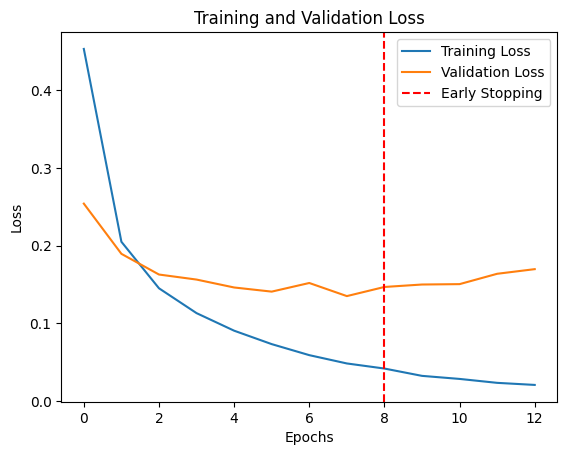

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

y_train_parity = np.array([np.sum(np.array(list(map(int, str(y))))) % 2 for y in y_train])
y_test_parity = np.array([np.sum(np.array(list(map(int, str(y))))) % 2 for y in y_test])

inputs = keras.Input(shape=(28, 28))
x = layers.Flatten()(inputs)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)
outputs_parity = layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs=inputs, outputs=[outputs, outputs_parity])

model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy', 'binary_crossentropy'], metrics=[['accuracy'], ['accuracy']])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(x_train, [y_train, y_train_parity], epochs=20, validation_split=0.2, callbacks=[early_stopping])

early_stopping_epoch = np.argmin(history.history['val_loss']) + 1
print("\n\nEarly stopping occurred at epoch:", early_stopping_epoch)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.axvline(x=early_stopping_epoch, color='r', linestyle='--', label='Early Stopping')
plt.legend()
plt.show()